In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.datasets import load_digits
import random
import math
import scipy.optimize as op 

In [3]:
data1 = sio.loadmat('ex4data1.mat')
X = data1['X']
y = data1['y']
y[np.where(y==10)]=0

In [4]:
m = X.shape[0]
rand_indices = list(range(m))
random.shuffle(rand_indices)
sel = X[rand_indices[0:100],:]

In [5]:
def displayData(data, initial_width=20):
    m, n = data.shape
    initial_height = int(n/initial_width)
    print(initial_height)
    display_rows = int(np.sqrt(m))#向下取整
    display_cols = math.ceil(m/display_rows)#向上取整
    pad = 1
    display_array = - np.ones((pad+display_rows * (initial_height + pad), pad+display_cols * (initial_width + pad)))
    curr_ex = 0
    for i in range(0, display_rows):
        for j in range(0, display_cols):
            if curr_ex>m:
                break
            max_val = np.max(np.abs(data[curr_ex, :]))
            display_array[0+(pad+(i)*(initial_height+pad)):initial_height+(pad+(i)*(initial_height+pad)),
                         0+(pad+(j)*(initial_width+ pad)):initial_width+(pad+(j)*(initial_width+pad))]=data[curr_ex, 
                                                                                    :].reshape(initial_height,
                                                                                              initial_width)/max_val
            
            curr_ex +=1
        if curr_ex>m:
            break
    plt.gray()
    plt.matshow(display_array.T)
    plt.show()

20


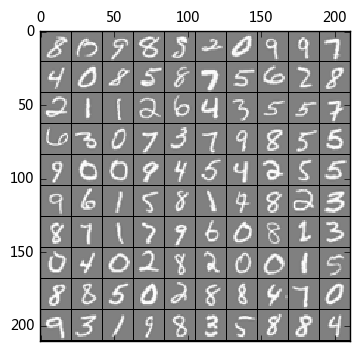

In [6]:
displayData(sel)

In [7]:
theta_pre = sio.loadmat('ex4weights.mat')
Theta1 = theta_pre['Theta1']
Theta2 = theta_pre['Theta2']
print(Theta1.shape, Theta2.shape)

(25, 401) (10, 26)


In [8]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10
nn_params = np.r_[Theta1.flatten(),Theta2.flatten()]

In [9]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g
    

In [16]:
def nnCostFunction(nn_params, input_layer_size, 
                   hidden_layer_size,num_labels, X, y, lamda):
    Theta1 = nn_params[0:hidden_layer_size*(input_layer_size+1)].reshape(hidden_layer_size, input_layer_size+1)
    Theta2 = nn_params[hidden_layer_size*(input_layer_size+1):].reshape(num_labels, hidden_layer_size+1)
    m = X.shape[0]
    Y = np.ones((y.shape[0], num_labels))
    E = np.eye(num_labels)
    for i in range(num_labels):
        Y_temp = np.where(y==i)[0]
        Y[Y_temp, :] = np.tile(E[i, :], (Y_temp.shape[0], 1))
    #compute forward costfunction
    X = np.c_[np.ones((X.shape[0], 1)), X]
    a2 = sigmoid(X.dot(Theta1.T))
    a2 = np.c_[np.ones((a2.shape[0], 1)), a2]
    a3 = sigmoid(a2.dot(Theta2.T))
    
    cost =  (Y*(np.log(a3))+(1-Y)*(np.log(1-a3)))
    print(cost.shape)
    J = -1/m*np.sum(cost,axis=1)
    print(J.shape)
                               
    #J = -1/m*(y.dot())

In [17]:
lamda = 0
J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                  num_labels, X, y, lamda)

(5000, 10)
(5000,)
